<a href="https://colab.research.google.com/github/RakibRayans/Computer-Vision/blob/main/Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy opencv-python scikit-image tensorflow keras matplotlib

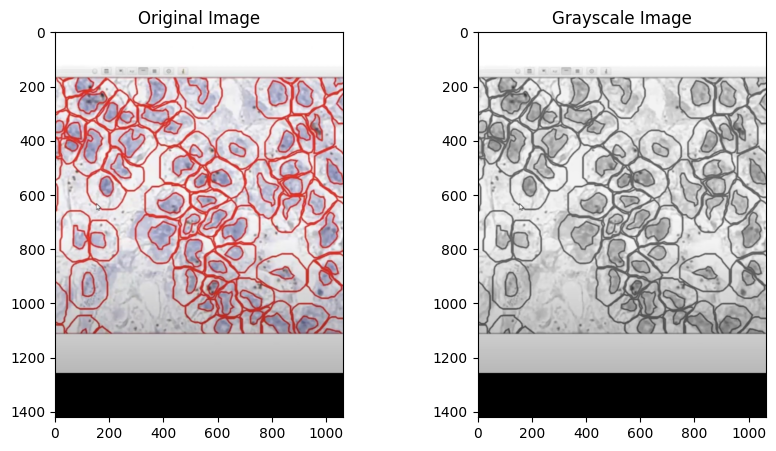

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Try loading the image from a different path
image = cv2.imread('/content/drive/MyDrive/Segementation/cell/cell.jpeg')

# Or, try loading the image from a URL
import urllib.request

# url = 'https://example.com/cell_image.png'
# image = cv2.imread(urllib.request.urlopen(url))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.show()


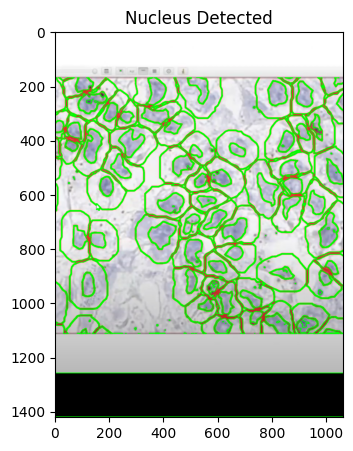

In [ ]:
# Apply thresholding to segment the nucleus
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
nucleus_detected = image.copy()
cv2.drawContours(nucleus_detected, contours, -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(5, 5))
plt.title('Nucleus Detected')
plt.imshow(cv2.cvtColor(nucleus_detected, cv2.COLOR_BGR2RGB))
plt.show()


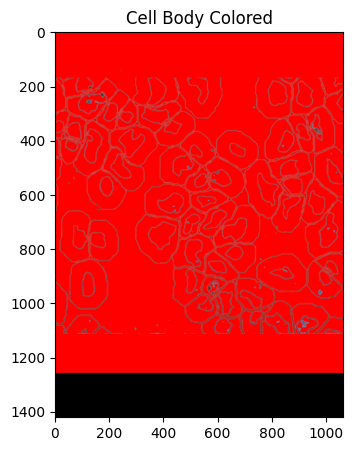

In [ ]:
# Create a mask for the nucleus
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

# Invert the mask to get the cell body
cell_body_mask = cv2.bitwise_not(mask)

# Color the cell body in blue
cell_body_colored = image.copy()
cell_body_colored[cell_body_mask == 255] = [0, 0, 255]

# Display the colored cell body
plt.figure(figsize=(5, 5))
plt.title('Cell Body Colored')
plt.imshow(cv2.cvtColor(cell_body_colored, cv2.COLOR_BGR2RGB))
plt.show()


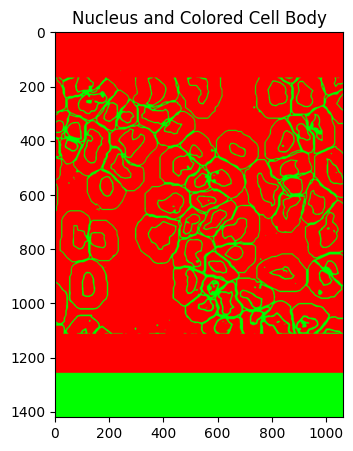

In [ ]:
# Combine nucleus and colored cell body
combined_image = image.copy()
combined_image[cell_body_mask == 255] = [0, 0, 255]  # Color cell body
combined_image[mask == 255] = [0, 255, 0]  # Color nucleus

# Display the combined result
plt.figure(figsize=(5, 5))
plt.title('Nucleus and Colored Cell Body')
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
pip install opencv-python pydrive numpy matplotlib


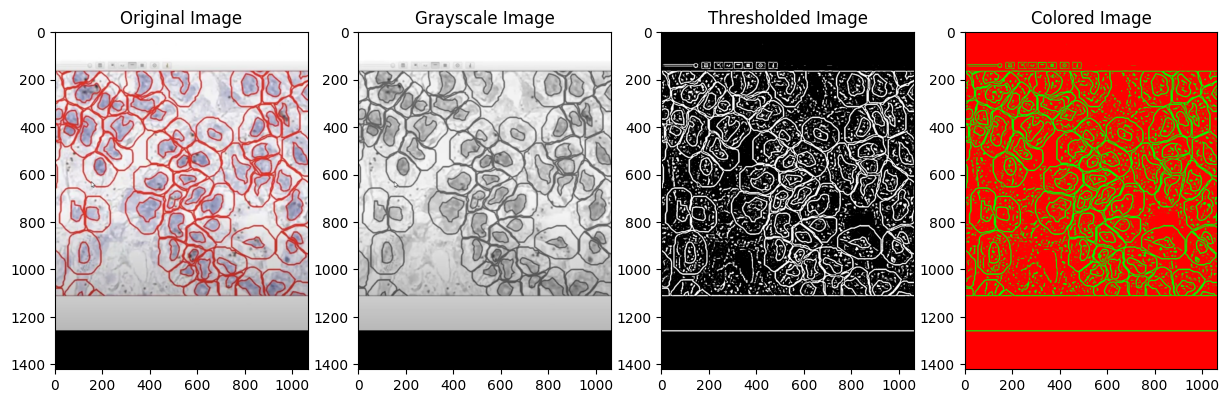

In [ ]:
from google.colab import drive
import cv2
import numpy as np
from matplotlib import pyplot as plt

# # Mount Google Drive
# drive.mount('/content/drive')

# Replace 'your_image_path' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/cell.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to better segment the nucleus
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the nucleus
nucleus_mask = np.zeros_like(gray)
cv2.drawContours(nucleus_mask, contours, -1, 255, thickness=cv2.FILLED)

# Create the cell body mask by inverting the nucleus mask
cell_body_mask = cv2.bitwise_not(nucleus_mask)

# Dilate the nucleus mask to create the boundary region
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dilated_nucleus_mask = cv2.dilate(nucleus_mask, kernel, iterations=1)

# The region between the nucleus boundary and the cell boundary
region_between_mask = cv2.bitwise_and(dilated_nucleus_mask, cell_body_mask)

# Color the regions
colored_image = image.copy()
colored_image[nucleus_mask == 255] = [0, 255, 0]  # Green for nucleus
colored_image[region_between_mask == 255] = [0, 255, 255]  # Cyan for region between nucleus and cell body
colored_image[cell_body_mask == 255] = [0, 0, 255]  # Blue for cell body

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Image')
plt.imshow(thresh, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Colored Image')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


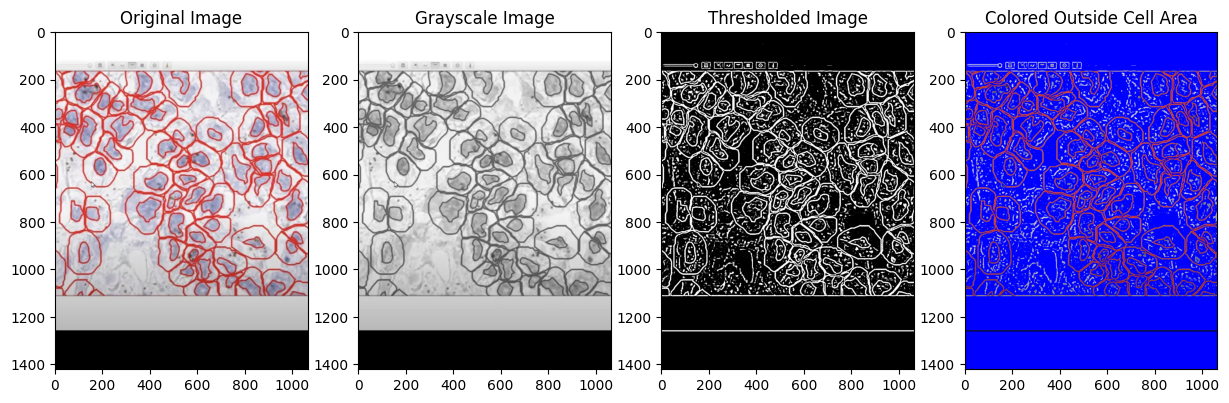

In [ ]:


# Replace 'your_image_path' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/cell.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to better segment the cell
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the entire cell
cell_mask = np.zeros_like(gray)
cv2.drawContours(cell_mask, contours, -1, 255, thickness=cv2.FILLED)

# Invert the mask to get the area outside the cell
outside_cell_mask = cv2.bitwise_not(cell_mask)

# Color the areas outside the cell
colored_image = image.copy()
colored_image[outside_cell_mask == 255] = [255, 0, 0]  # Red for areas outside the cell

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Image')
plt.imshow(thresh, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Colored Outside Cell Area')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


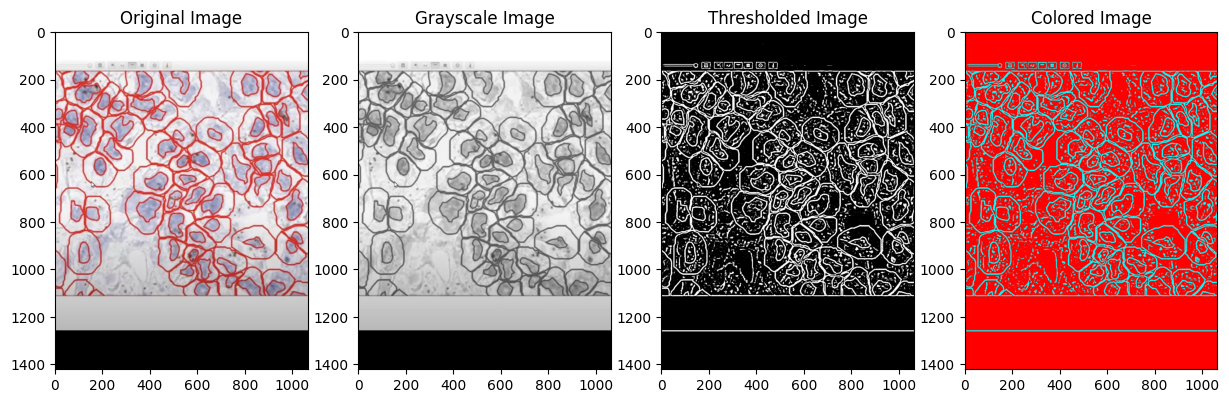

In [ ]:


# Replace 'your_image_path' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/cell.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to better segment the nucleus
nucleus_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours of the nucleus
nucleus_contours, _ = cv2.findContours(nucleus_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the nucleus
nucleus_mask = np.zeros_like(gray)
cv2.drawContours(nucleus_mask, nucleus_contours, -1, 255, thickness=cv2.FILLED)

# Create the cell body mask by inverting the nucleus mask
cell_body_mask = cv2.bitwise_not(nucleus_mask)

# Dilate the nucleus mask to create a boundary
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dilated_nucleus_mask = cv2.dilate(nucleus_mask, kernel, iterations=1)

# Create the mask for the region between nucleus and cell boundary
region_between_mask = cv2.bitwise_and(dilated_nucleus_mask, cell_body_mask)

# Create a mask for the entire cell (including the nucleus)
cell_mask = np.zeros_like(gray)
cv2.drawContours(cell_mask, nucleus_contours, -1, 255, thickness=cv2.FILLED)

# Color the regions
colored_image = image.copy()
colored_image[cell_body_mask == 255] = [0, 0, 255]  # Blue for cell body
colored_image[nucleus_mask == 255] = [0, 255, 0]  # Green for nucleus
colored_image[cv2.bitwise_not(cell_body_mask) == 255] = [255, 255, 0]  # Yellow for background

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Image')
plt.imshow(nucleus_thresh, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Colored Image')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


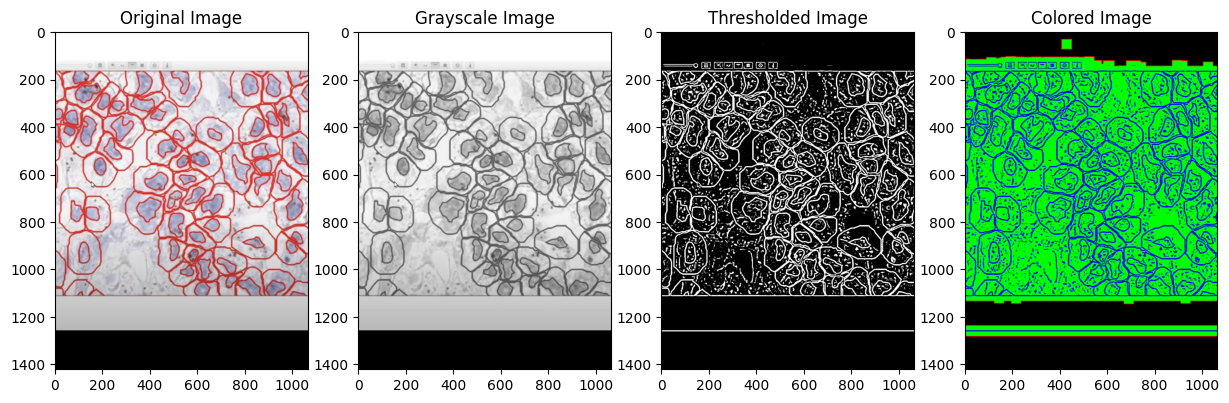

In [ ]:


# Replace 'your_image_path' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/cell.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to better segment the nucleus
nucleus_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours of the nucleus
nucleus_contours, _ = cv2.findContours(nucleus_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the nucleus
nucleus_mask = np.zeros_like(gray)
cv2.drawContours(nucleus_mask, nucleus_contours, -1, 255, thickness=cv2.FILLED)

# Dilate the nucleus mask to approximate the cell body area
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), np.uint8)
cell_body_mask = cv2.dilate(nucleus_mask, kernel, iterations=3)  # Increase iterations if needed

# Create a colored image initialized with zeros (black)
colored_image = np.zeros_like(image)

# Color the nucleus area
colored_image[nucleus_mask == 255] = [255, 0, 0]  # Blue for nucleus

# Color the cell body area (excluding the nucleus area)
cell_body_only_mask = cell_body_mask.copy()
cell_body_only_mask[nucleus_mask == 255] = 0
colored_image[cell_body_only_mask == 255] = [0, 255, 0]  # Green for cell body

# Draw cell boundaries in red
cell_boundaries = cv2.findContours(cell_body_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
cv2.drawContours(colored_image, cell_boundaries, -1, (0, 0, 255), 2)  # Red for boundaries

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Image')
plt.imshow(nucleus_thresh, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Colored Image')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


In [16]:
!pip install stardist
!pip install csbdeep


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 8.8 MB/s eta 0:00:00


In [17]:
from stardist.models import StarDist2D
from csbdeep.utils import normalize


In [19]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize the grayscale image
gray_image_normalized = normalize(gray_image, 1, 99.8, axis=(0, 1))

# Predict objects using the StarDist model
probabilities, polygons = model.predict_instances(gray_image_normalized)

In [21]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')
# Normalize image
image_normalized = normalize(image, 1, 99.8, axis=(0, 1))



Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


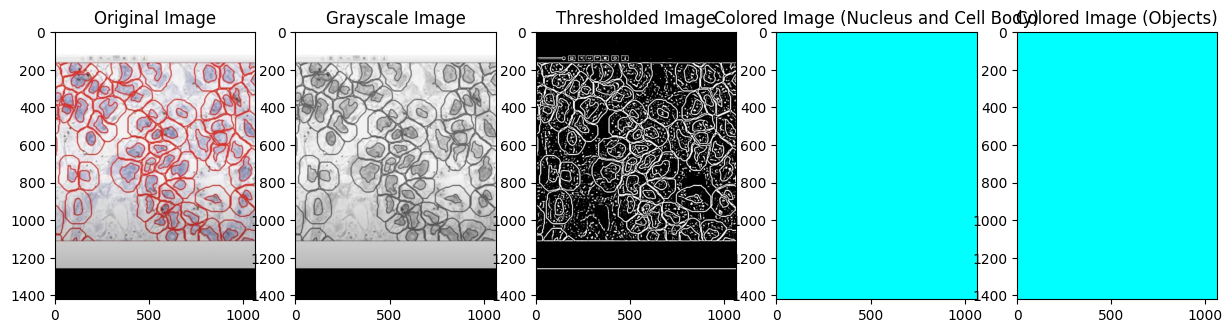

In [30]:
# Create a mask for the objects
object_mask = polygons['coord'][0][..., 0] > 0

# Color the object areas
colored_image[object_mask[...,0]] = [255, 255, 0]  # Yellow for objects

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Thresholded Image')
plt.imshow(nucleus_thresh, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('Colored Image (Nucleus and Cell Body)')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 5)
plt.title('Colored Image (Objects)')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()
